In [1]:
import yfinance as yf

silver_data = yf.download("SI=F", start="2001-01-01", end="2023-03-30")
print("Silver dataset\n", silver_data)

[*********************100%***********************]  1 of 1 completed
Silver dataset
                  Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2001-01-02   4.545000   4.545000   4.545000   4.545000   4.545000      40
2001-01-03   4.500000   4.500000   4.490000   4.490000   4.490000       0
2001-01-04   4.532000   4.532000   4.532000   4.532000   4.532000      35
2001-01-05   4.555000   4.555000   4.555000   4.555000   4.555000       0
2001-01-08   4.545000   4.545000   4.545000   4.545000   4.545000       8
...               ...        ...        ...        ...        ...     ...
2023-03-23  23.143999  23.143999  23.143999  23.143999  23.143999       0
2023-03-24  23.247000  23.247000  23.247000  23.247000  23.247000      15
2023-03-27  23.054001  23.054001  23.054001  23.054001  23.054001       0
2023-03-28  23.094999  23.323999  23.094999  23.323999  23.323999      36
2023-03-29  23.375999  23.3

In [2]:
import pandas as pd

silver_df = pd.DataFrame(silver_data)
print("Silver\n",silver_df)

Silver
                  Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2001-01-02   4.545000   4.545000   4.545000   4.545000   4.545000      40
2001-01-03   4.500000   4.500000   4.490000   4.490000   4.490000       0
2001-01-04   4.532000   4.532000   4.532000   4.532000   4.532000      35
2001-01-05   4.555000   4.555000   4.555000   4.555000   4.555000       0
2001-01-08   4.545000   4.545000   4.545000   4.545000   4.545000       8
...               ...        ...        ...        ...        ...     ...
2023-03-23  23.143999  23.143999  23.143999  23.143999  23.143999       0
2023-03-24  23.247000  23.247000  23.247000  23.247000  23.247000      15
2023-03-27  23.054001  23.054001  23.054001  23.054001  23.054001       0
2023-03-28  23.094999  23.323999  23.094999  23.323999  23.323999      36
2023-03-29  23.375999  23.375999  23.375999  23.375999  23.375999     188

[5582 rows x 6 columns]


In [3]:
silver_df.to_csv('SilverPrice.csv')
silver_df = pd.read_csv('SilverPrice.csv')

In [4]:
silver_df = silver_df[['Date','Close']]
print("Silver\n",silver_df)

Silver
             Date      Close
0     2001-01-02   4.545000
1     2001-01-03   4.490000
2     2001-01-04   4.532000
3     2001-01-05   4.555000
4     2001-01-08   4.545000
...          ...        ...
5577  2023-03-23  23.143999
5578  2023-03-24  23.247000
5579  2023-03-27  23.054001
5580  2023-03-28  23.323999
5581  2023-03-29  23.375999

[5582 rows x 2 columns]


In [5]:
silver_df['Date']


0       2001-01-02
1       2001-01-03
2       2001-01-04
3       2001-01-05
4       2001-01-08
           ...    
5577    2023-03-23
5578    2023-03-24
5579    2023-03-27
5580    2023-03-28
5581    2023-03-29
Name: Date, Length: 5582, dtype: object

In [6]:
import datetime

def str_to_datetime(s):
    if isinstance(s, datetime.datetime):
        return s
    else:
        s = str(s)
        split = s.split('-')
        year, month, day = int(split[0]), int(split[1]), int(split[2])
        return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('2001-01-02')
datetime_object

datetime.datetime(2001, 1, 2, 0, 0)

In [7]:
silver_df['Date'] = silver_df['Date'].apply(str_to_datetime)
print("silver_date\n",silver_df['Date'])

silver_date
 0      2001-01-02
1      2001-01-03
2      2001-01-04
3      2001-01-05
4      2001-01-08
          ...    
5577   2023-03-23
5578   2023-03-24
5579   2023-03-27
5580   2023-03-28
5581   2023-03-29
Name: Date, Length: 5582, dtype: datetime64[ns]


In [8]:
silver_df.index = silver_df.pop('Date')
print("Silver\n",silver_df)

Silver
                 Close
Date                 
2001-01-02   4.545000
2001-01-03   4.490000
2001-01-04   4.532000
2001-01-05   4.555000
2001-01-08   4.545000
...               ...
2023-03-23  23.143999
2023-03-24  23.247000
2023-03-27  23.054001
2023-03-28  23.323999
2023-03-29  23.375999

[5582 rows x 1 columns]


In [9]:
print("Silver\n",silver_df.shape)

Silver
 (5582, 1)


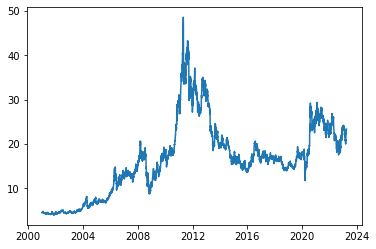

In [10]:
import matplotlib.pyplot as plt
plt.plot(silver_df)

In [11]:
import numpy as np

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
silver_df = scaler.fit_transform(np.array(silver_df).reshape(-1,1))
print("Silver\n",silver_df)

Silver
 [[0.01164774]
 [0.01041339]
 [0.01135599]
 ...
 [0.42703894]
 [0.43309842]
 [0.43426544]]


In [46]:
train_1 = int(len(silver_df)*0.75)
test_1 = len(silver_df) - train_1

train_1data, test_1data = silver_df[0:train_1,:],silver_df[train_1:len(silver_df),:1]

In [47]:
print(len(train_1data), len(test_1data))

4186 1396


In [48]:
import numpy as np

def create_dataset1(silver_df1, time_step = 1):
    S_dataX, S_dataY  = [], []
    for i in range(len(silver_df1)-time_step):
        a = silver_df1[i:(i+time_step), 0]
        aa = np.round(a, 5)
        S_dataX.append(aa)
        S_dataY.append(silver_df1[i+time_step, 0])
    return np.array(S_dataX, dtype=object), np.array(S_dataY, dtype=object)

In [49]:
time_step = 365

X_train_Silver, Y_train_Silver = create_dataset1(train_1data, time_step)
X_test_Silver, Y_test_Silver = create_dataset1(test_1data, time_step)

In [50]:
print(X_train_Silver.shape)
print(X_test_Silver.shape), print(Y_test_Silver.shape)

(3821, 365)
(1031, 365)
(1031,)


(None, None)

In [51]:
print(X_train_Silver)

[[0.01165 0.01041 0.01136 ... 0.01782 0.01831 0.01825]
 [0.01041 0.01136 0.01187 ... 0.01831 0.01825 0.01887]
 [0.01136 0.01187 0.01165 ... 0.01825 0.01887 0.01854]
 ...
 [0.25219 0.25057 0.25064 ... 0.30194 0.30731 0.31014]
 [0.25057 0.25064 0.2516 ... 0.30731 0.31014 0.30948]
 [0.25064 0.2516 0.25091 ... 0.31014 0.30948 0.31397]]


In [52]:
X_train_Silver = X_train_Silver.reshape(X_train_Silver.shape[0],X_train_Silver.shape[1] , 1)
X_test_Silver = X_test_Silver.reshape(X_test_Silver.shape[0],X_test_Silver.shape[1] , 1)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [54]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(365,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 365, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 365, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [56]:
X_train_Silver = np.asarray(X_train_Silver).astype(np.float32)
Y_train_Silver = np.asarray(Y_train_Silver).astype(np.float32)
X_test_Silver = np.asarray(X_test_Silver).astype(np.float32)
Y_test_Silver = np.asarray(Y_test_Silver).astype(np.float32)

In [57]:
model.fit(X_train_Silver,Y_train_Silver,validation_data=(X_test_Silver,Y_test_Silver),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
60/60 [==============================] - 77s 1s/step - loss: 0.0075 - val_loss: 8.3048e-04
Epoch 2/50
60/60 [==============================] - 59s 983ms/step - loss: 7.7774e-04 - val_loss: 7.6103e-04
Epoch 3/50
60/60 [==============================] - 61s 1s/step - loss: 7.2097e-04 - val_loss: 6.7394e-04
Epoch 4/50
60/60 [==============================] - 60s 996ms/step - loss: 6.9315e-04 - val_loss: 7.4763e-04
Epoch 5/50
60/60 [==============================] - 58s 973ms/step - loss: 6.1417e-04 - val_loss: 5.1747e-04
Epoch 6/50
60/60 [==============================] - 57s 945ms/step - loss: 4.9981e-04 - val_loss: 5.2641e-04
Epoch 7/50
60/60 [==============================] - 57s 950ms/step - loss: 4.7650e-04 - val_loss: 5.3323e-04
Epoch 8/50
60/60 [==============================] - 56s 943ms/step - loss: 5.1424e-04 - val_loss: 4.1314e-04
Epoch 9/50
60/60 [==============================] - 56s 940ms/step - loss: 3.7076e-04 - val_loss: 3.6995e-04
Epoch 10/50
60/60 [==========

In [58]:
import tensorflow as tf

In [59]:
Silvertrain_predict = model.predict(X_train_Silver)
Silvertest_predict = model.predict(X_test_Silver)

33/33 [==============================] - 8s 238ms/step


In [60]:
Silvertrain_predict = scaler.inverse_transform(Silvertrain_predict)
Silvertest_predict = scaler.inverse_transform(Silvertest_predict)

In [61]:
import math
from sklearn.metrics import mean_squared_error

Silver_trainmse = math.sqrt(mean_squared_error(Y_train_Silver,Silvertrain_predict))
print(Silver_trainmse)
Silver_testmse = math.sqrt(mean_squared_error(Y_test_Silver,Silvertest_predict))
print(Silver_testmse)

18.45375508291351
21.444235941785223


In [62]:
silver_df.shape
Silvertrain_predict.shape
Silvertest_predict.shape

(1031, 1)

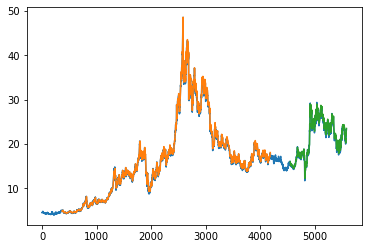

In [63]:
import numpy

time_steps = 365

SilvertrainPredictPlot = numpy.empty_like(silver_df)
SilvertrainPredictPlot[:, :] = np.nan
SilvertrainPredictPlot[time_steps:len(Silvertrain_predict)+time_steps, :] = Silvertrain_predict

SilvertestPredictPlot = numpy.empty_like(silver_df)
SilvertestPredictPlot[:, :] = np.nan
SilvertestPredictPlot[len(Silvertrain_predict)+(time_steps*2):len(silver_df), :] = Silvertest_predict

plt.plot(scaler.inverse_transform(silver_df))
plt.plot(SilvertrainPredictPlot)
plt.plot(SilvertestPredictPlot)
plt.show()

In [65]:
print(len(test_1data))

1396


In [66]:
Silver_input = test_1data[1031:].reshape(1,-1)
Silver_input.shape

(1, 365)

In [67]:
Silvertemp_input = list(Silver_input)
Silvertemp_input = Silvertemp_input[0].tolist()

In [68]:
from numpy import array 

Silver_output = []
n_steps = 365
i = 0
while(i<365):
    if(len(Silvertemp_input)>365):
        Silver_input = np.array(Silvertemp_input[1:])
        print("{} day input {}".format(i,Silver_input))
        Silver_input = Silver_input.reshape(1,-1)
        Silver_input = Silver_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(Silver_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        Silvertemp_input.extend(yhat[0].tolist())
        Silvertemp_input = Silvertemp_input[1:]
        
        Silver_output.extend(yhat.tolist())
        i = i+1
    
    else:
        Silver_input = Silver_input.reshape((1, n_steps, 1))
        yhat = model.predict(Silver_input, verbose=0)
        print(yhat[0])
        Silvertemp_input.extend(yhat[0].tolist())
        print(len(Silvertemp_input))
        Silver_output.extend(yhat.tolist())
        i = i+1

print(Silver_output)

[0.43968368]
366
1 day input [0.43128058 0.44517258 0.45778536 0.45163606 0.45789759 0.46110689
 0.45019975 0.45251132 0.45089548 0.44703532 0.44970599 0.43704834
 0.43089905 0.44616007 0.45168097 0.4603214  0.45529422 0.4654832
 0.47746759 0.47843261 0.47311371 0.46945555 0.47446025 0.46849049
 0.46577496 0.45493516 0.43558956 0.43695858 0.42822839 0.42131604
 0.42055298 0.41009471 0.40966832 0.41337133 0.4085013  0.41431392
 0.41213698 0.40280087 0.40697518 0.40989275 0.40084832 0.39234255
 0.41359576 0.41476278 0.40955608 0.41465059 0.42115894 0.42427847
 0.42535572 0.42831815 0.42241572 0.42645541 0.43318819 0.42111408
 0.42667984 0.42919341 0.40728937 0.41222674 0.41339376 0.42147313
 0.43031556 0.42930564 0.4238296  0.43675658 0.45334171 0.46422642
 0.45531665 0.44366893 0.44593564 0.44393822 0.41848827 0.41016204
 0.41224922 0.4167602  0.4193411  0.41180035 0.41404463 0.42753266
 0.43020333 0.43336776 0.43747474 0.43404101 0.44479105 0.43341262
 0.43931505 0.44544191 0.44806767 

In [69]:
Silver_new = np.arange(1,366)
Silver_pred = np.arange(366,732)

In [70]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

Silver_original = scaler.inverse_transform(Silver_output)
Silver = pd.DataFrame(Silver_original)

Silver.columns = ['SP_predict']
print(Silver)

     SP_predict
0     23.617425
1     23.806760
2     24.022426
3     24.243137
4     24.462703
..          ...
360   46.959211
361   46.959219
362   46.959217
363   46.959211
364   46.959211

[365 rows x 1 columns]


In [71]:
silver_date = pd.DataFrame({'date': pd.date_range(start = '2023-03-30', end = '2024-03-28')}) 
print(silver_date)

          date
0   2023-03-30
1   2023-03-31
2   2023-04-01
3   2023-04-02
4   2023-04-03
..         ...
360 2024-03-24
361 2024-03-25
362 2024-03-26
363 2024-03-27
364 2024-03-28

[365 rows x 1 columns]


In [72]:
SP_forecast = pd.concat([silver_date, Silver],axis=1,join='outer')
SP_forecast

,date,SP_predict
0,2023-03-30,23.617425
1,2023-03-31,23.806760
2,2023-04-01,24.022426
3,2023-04-02,24.243137
4,2023-04-03,24.462703
...,...,...
360,2024-03-24,46.959211
361,2024-03-25,46.959219
362,2024-03-26,46.959217
363,2024-03-27,46.959211


In [73]:
d1 = str_to_datetime('2023-03-30')
d2 = str_to_datetime('2023-05-04')

# difference between dates in timedelta
delta = d2 - d1
print(f'Difference is {delta.days} days')
delta_intr = delta.days

print("Number of days:",delta_intr)

Difference is 35 days
Number of days: 35


In [74]:
SP_forecast.iloc[(delta_intr-1)]

date          2023-05-03 00:00:00
SP_predict               32.18143
Name: 34, dtype: object

In [75]:
for i in range(delta_intr):
    print(SP_forecast.iloc[i])

date          2023-03-30 00:00:00
SP_predict              23.617425
Name: 0, dtype: object
date          2023-03-31 00:00:00
SP_predict               23.80676
Name: 1, dtype: object
date          2023-04-01 00:00:00
SP_predict              24.022426
Name: 2, dtype: object
date          2023-04-02 00:00:00
SP_predict              24.243137
Name: 3, dtype: object
date          2023-04-03 00:00:00
SP_predict              24.462703
Name: 4, dtype: object
date          2023-04-04 00:00:00
SP_predict              24.679306
Name: 5, dtype: object
date          2023-04-05 00:00:00
SP_predict              24.893317
Name: 6, dtype: object
date          2023-04-06 00:00:00
SP_predict              25.106284
Name: 7, dtype: object
date          2023-04-07 00:00:00
SP_predict              25.320171
Name: 8, dtype: object
date          2023-04-08 00:00:00
SP_predict              25.536805
Name: 9, dtype: object
date          2023-04-09 00:00:00
SP_predict              25.757519
Name: 10, dtype: objec

In [76]:
import pickle

file = 'SilverPrice_final.sav'
pickle.dump(model,open(file,'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-04-28 15:33:58         3474
metadata.json                                  2023-04-28 15:33:58      

In [77]:
model = pickle.load(open('SilverPrice_final.sav','rb'))

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-28 15:33:58         3474
metadata.json                                  2023-04-28 15:33:58           64
variables.h5                                   2023-04-28 15:34:00       643480
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
........

In [81]:
d1 = str_to_datetime('2023-03-30')
d2 = str_to_datetime('2023-04-25')

# difference between dates in timedelta
delta = d2 - d1
print(f'Difference is {delta.days} days')
delta_intr = delta.days

print("Number of days:",delta_intr)

Difference is 26 days
Number of days: 26


In [82]:
SP_forecast.iloc[(delta_intr-1)]

date          2023-04-24 00:00:00
SP_predict              29.566467
Name: 25, dtype: object

In [83]:
for i in range(delta_intr):
    print(SP_forecast.iloc[i])

date          2023-03-30 00:00:00
SP_predict              23.617425
Name: 0, dtype: object
date          2023-03-31 00:00:00
SP_predict               23.80676
Name: 1, dtype: object
date          2023-04-01 00:00:00
SP_predict              24.022426
Name: 2, dtype: object
date          2023-04-02 00:00:00
SP_predict              24.243137
Name: 3, dtype: object
date          2023-04-03 00:00:00
SP_predict              24.462703
Name: 4, dtype: object
date          2023-04-04 00:00:00
SP_predict              24.679306
Name: 5, dtype: object
date          2023-04-05 00:00:00
SP_predict              24.893317
Name: 6, dtype: object
date          2023-04-06 00:00:00
SP_predict              25.106284
Name: 7, dtype: object
date          2023-04-07 00:00:00
SP_predict              25.320171
Name: 8, dtype: object
date          2023-04-08 00:00:00
SP_predict              25.536805
Name: 9, dtype: object
date          2023-04-09 00:00:00
SP_predict              25.757519
Name: 10, dtype: objec